In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

In [3]:
all_data = pd.read_csv("cleaned_all_data.csv")
print(all_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeID               4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4410 non-null   float64
 14  PercentSalaryHike       

In [4]:
# Defining different types of features

categorical_features = all_data.select_dtypes(include=['object']).columns.drop(['Attrition'])
numerical_features = all_data.select_dtypes(exclude=['object']).columns.drop(['EmployeeID'])

In [5]:
# Applying Encoder and Scaler

encoder = OneHotEncoder()
scaler = StandardScaler()

categorical_encoded = pd.DataFrame(encoder.fit_transform(all_data[categorical_features]).toarray(), columns=encoder.get_feature_names_out(categorical_features))
numerical_scaled = pd.DataFrame(scaler.fit_transform(all_data[numerical_features]), columns=numerical_features)

X = pd.concat([categorical_encoded, numerical_scaled], axis=1)
y = all_data['Attrition']
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   BusinessTravel_Non-Travel          4410 non-null   float64
 1   BusinessTravel_Travel_Frequently   4410 non-null   float64
 2   BusinessTravel_Travel_Rarely       4410 non-null   float64
 3   Department_Human Resources         4410 non-null   float64
 4   Department_Research & Development  4410 non-null   float64
 5   Department_Sales                   4410 non-null   float64
 6   EducationField_Human Resources     4410 non-null   float64
 7   EducationField_Life Sciences       4410 non-null   float64
 8   EducationField_Marketing           4410 non-null   float64
 9   EducationField_Medical             4410 non-null   float64
 10  EducationField_Other               4410 non-null   float64
 11  EducationField_Technical Degree    4410 non-null   float

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-1.322079,2.483396,-0.981014,-0.679146,-1.155935,0.379672,-0.426230,0.252200,1.148864,-1.085336
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.678877,0.155707,-0.327893,-0.368715,-0.034520,-1.026167,2.346151,0.252200,-0.666107,1.757749
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.807517,-0.620189,-0.327893,-0.679146,-0.314873,0.379672,-0.426230,-0.665460,-0.666107,-2.506879
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.221606,1.707500,0.161947,1.493867,0.245834,-1.026167,-0.426230,1.169861,1.148864,0.336206
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.292956,-0.620189,-0.164613,-0.679146,-0.034520,0.379672,-0.426230,1.169861,-1.573592,0.336206


In [6]:
# Splitting Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train = y_train.replace({'Yes': 1, 'No': 0})
y_test = y_test.replace({'Yes': 1, 'No': 0})

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_5808\1911808517.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace({'Yes': 1, 'No': 0})
C:\Users\Administrateur\AppData\Local\Temp\ipykernel_5808\1911808517.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace({'Yes': 1, 'No': 0})


In [8]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42)
}

predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)

In [9]:
def display_metrics(y_test, y_pred, model_name):
      print("Model :", model_name)
      print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))
      print("Classification Report:\n", classification_report(y_test, y_pred))

for name, y_pred in predictions.items():
    display_metrics(y_test, y_pred, name)
    print("\n")

Model : LogisticRegression
Confusion Matrix :
 [[1082   33]
 [ 171   37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      1115
           1       0.53      0.18      0.27       208

    accuracy                           0.85      1323
   macro avg       0.70      0.57      0.59      1323
weighted avg       0.81      0.85      0.81      1323



Model : SVM
Confusion Matrix :
 [[1107    8]
 [ 123   85]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      1115
           1       0.91      0.41      0.56       208

    accuracy                           0.90      1323
   macro avg       0.91      0.70      0.75      1323
weighted avg       0.90      0.90      0.88      1323



Model : KNN
Confusion Matrix :
 [[1019   96]
 [ 161   47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86

In [10]:
# we check the timing for each model

import time

training_times = []
prediction_times = []

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    training_times.append(time.time() - start_time)

    start_time = time.time()
    model.predict(X_test)
    prediction_times.append(time.time() - start_time)

time_df = pd.DataFrame({
    'Model': models.keys(),
    'Training Time (s)': training_times,
    'Prediction Time (s)': prediction_times
})
print(time_df)

                Model  Training Time (s)  Prediction Time (s)
0  LogisticRegression           0.097148             0.006031
1                 SVM           2.641822             0.321983
2                 KNN           0.017863             0.143689
3        DecisionTree           0.075391             0.002435
4        RandomForest           0.949702             0.098094


In [11]:
# We're going to use Grid Search CV to improve the model by adjusting the hyperparameters for RandomForestClassifier. 
# We want to maximise the F1 Score (balance between precision and recall).

from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for RandomForest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='f1', verbose=3)
rf_grid_search.fit(X_train, y_train)

print("Best RandomForest Parameters:", rf_grid_search.best_params_)
print("Best RandomForest Score:", rf_grid_search.best_score_)

# Train the best RandomForest model
best_rf = rf_grid_search.best_estimator_
best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.589 total time=   0.3s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.701 total time=   0.4s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.710 total time=   0.2s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.667 total time=   0.3s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.608 total time=   0.3s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.595 total time=   0.7s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.697 total time=   0.7s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.734 total time=   0.7

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_5808\1096082050.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_importances_rf_df.reset_index(), y="index", x="Importance", palette="viridis")


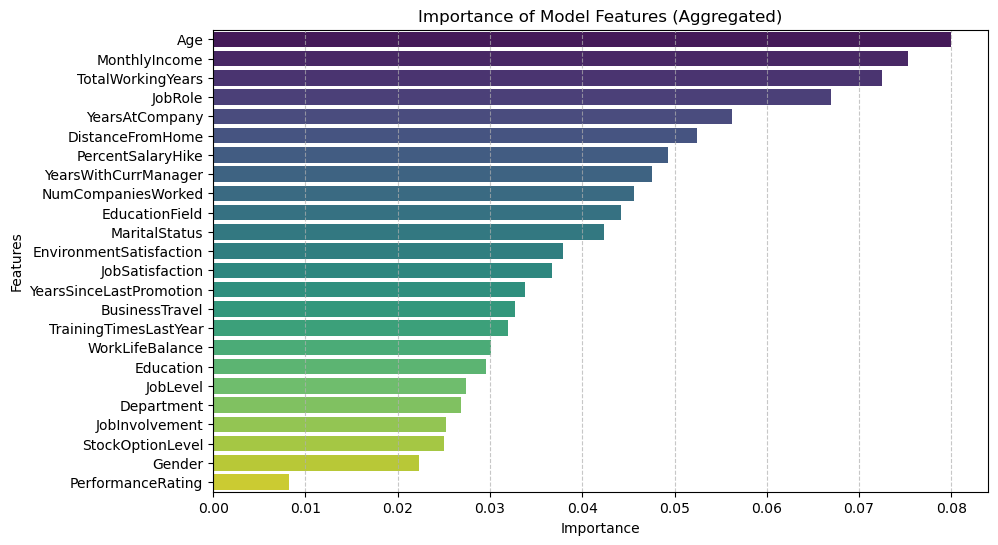

In [13]:
importances_rf = best_rf.feature_importances_
features = X.columns
grouped_importances = {}

for feature, importance in zip(features, importances_rf):
    original_feature = feature.split("_")[0]

    if original_feature in grouped_importances:
        grouped_importances[original_feature] += importance
    else:
        grouped_importances[original_feature] = importance

feat_importances_rf_df = pd.DataFrame.from_dict(grouped_importances, orient="index", columns=["Importance"])
feat_importances_rf_df = feat_importances_rf_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_importances_rf_df.reset_index(), y="index", x="Importance", palette="viridis")

plt.xlabel("Importance")
plt.ylabel("Features")
plt.yticks(fontsize=10)
plt.title("Importance of Model Features (Aggregated)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()